In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
from drift import Drift
from intervals import createDriftIntervals

ECG = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG805_data.out')
ECG1 = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG806_data.out')
max_length = 20000

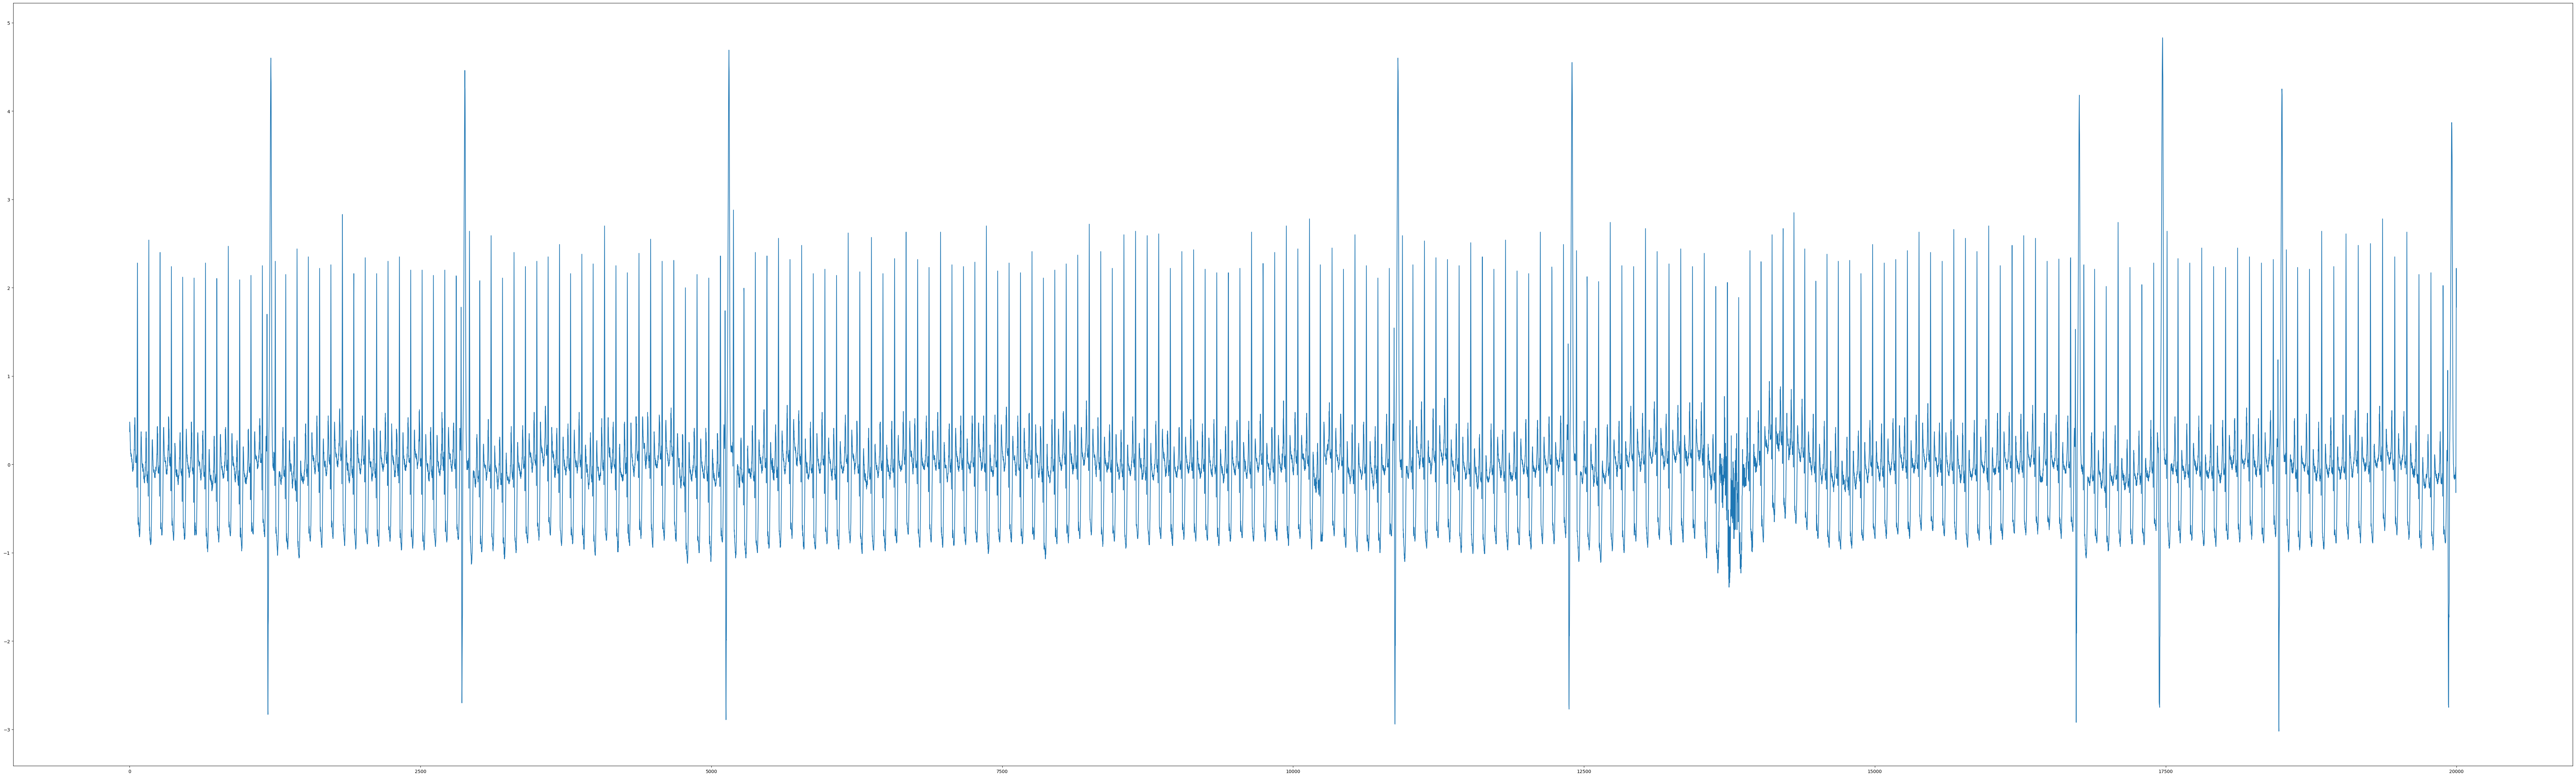

In [3]:
# plotting dataset 
drift_addition_1 = createDriftIntervals(ECG.iloc[0:max_length, :])

plt.figure(figsize=(100,30))
plt.plot(drift_addition_1.dataset.iloc[:,0])

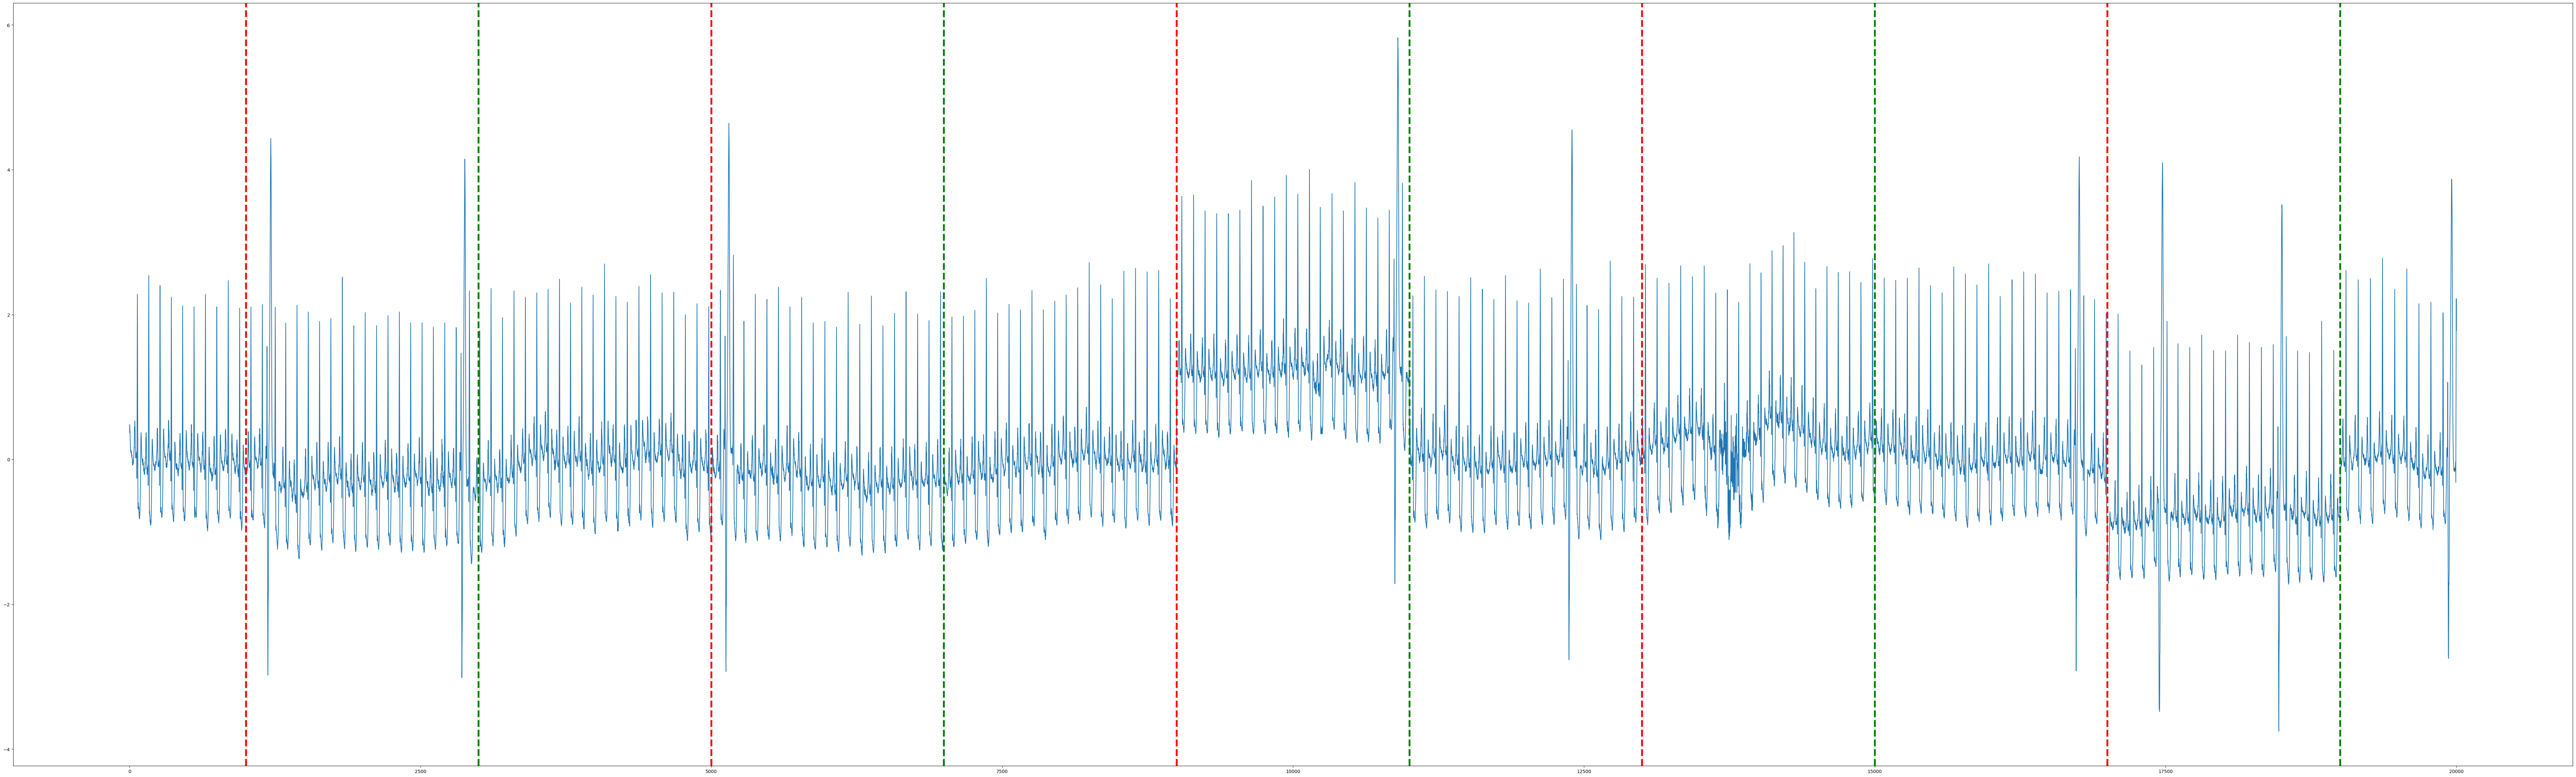

In [4]:
# creating 3 drift modules, one for each interval
meandrift1 = Drift('mean', 10, transition_period=0.2) # drift module 1
meandrift2 = Drift('mean', -13, transition_period=0) # drift module 3
meandrift3 = Drift('mean', 5, transition_period=0.5) # drift module 3

drift_addition_1.create_intervals(5,2000)
# add drift modules here corresponding to intervals
drift_addition_1.add_drifts(meandrift1, meandrift3, meandrift2, meandrift1, meandrift2) 
# fix mean allocation method (additional)mean should be interval before
# use the mean from the current interval, 
# foranomalies, distribution of the values, use distribution to modify the scale of the data
#

# plotting the dataset
drift_addition_1.plot_dataset()

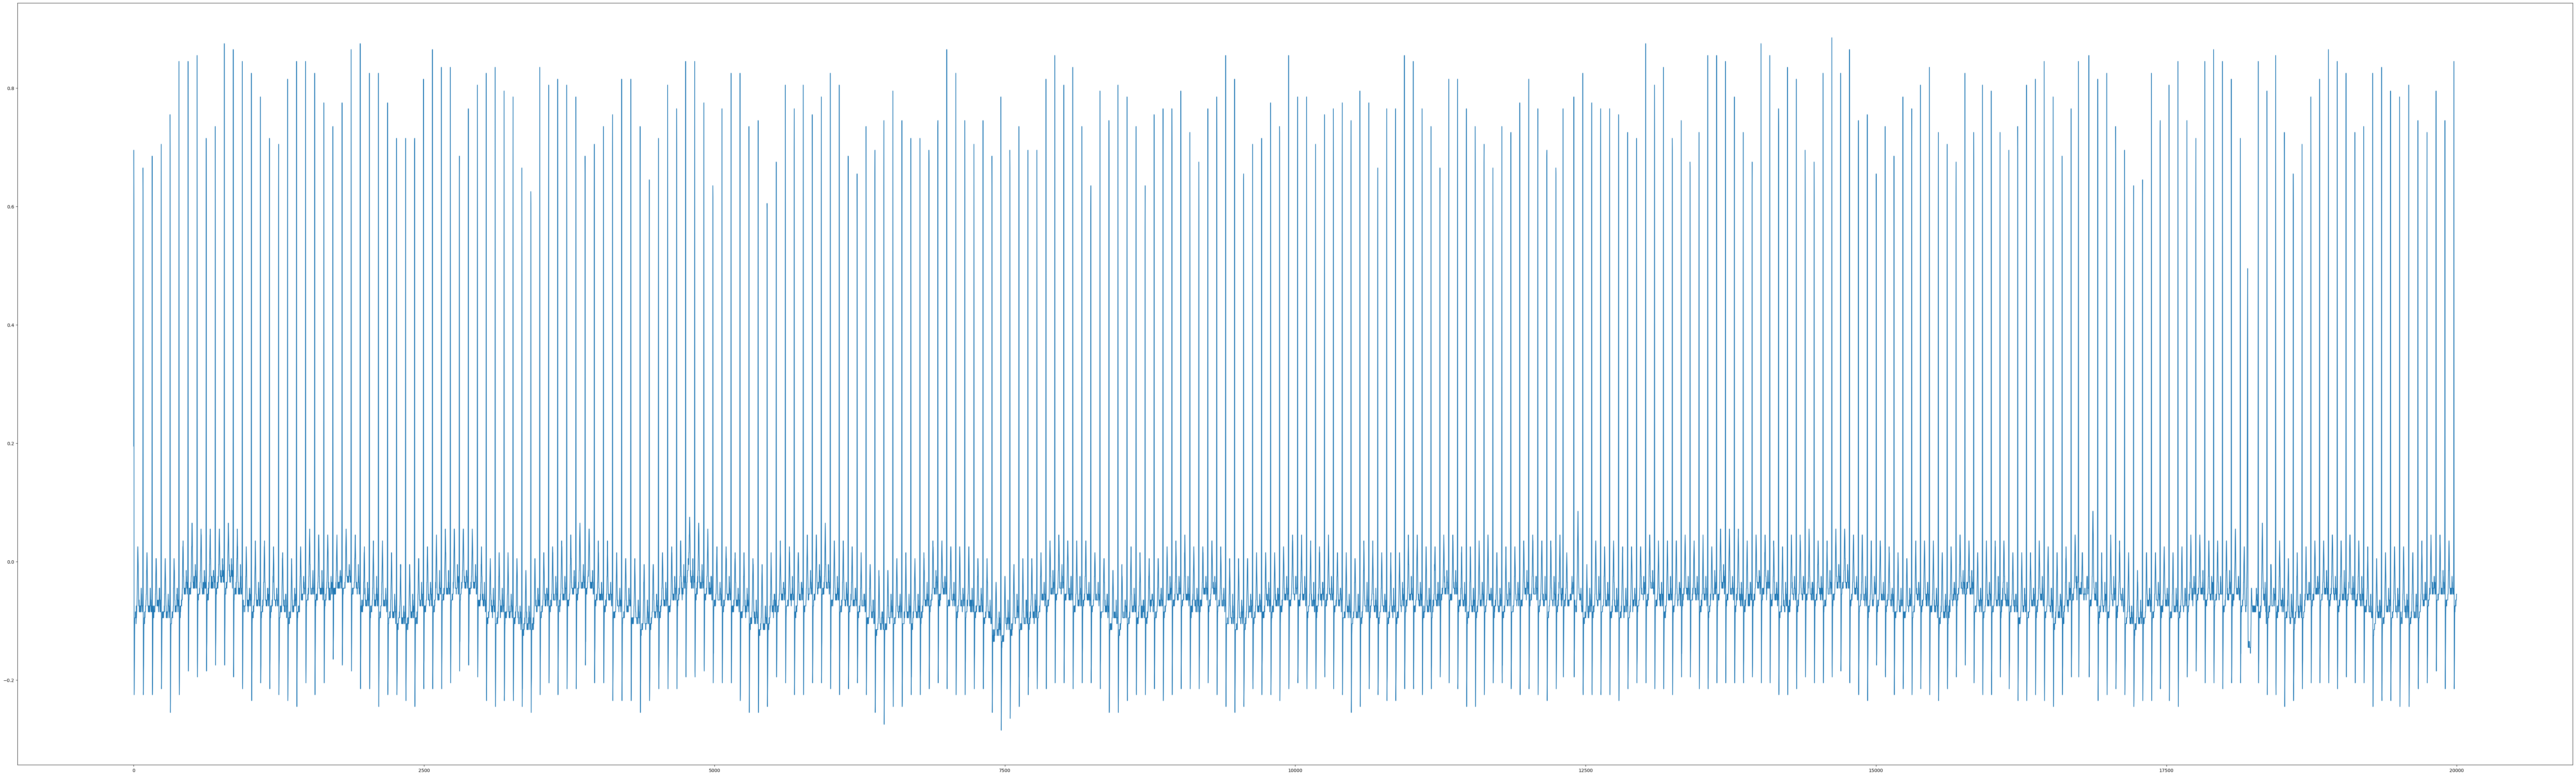

In [5]:
# plotting second dataset
from anomaly_intervals import *
from anomaly import *
anomaly_addition_1 = createAnomalyIntervals(ECG1.iloc[0:max_length, :])

plt.figure(figsize=(100,30))
plt.plot(anomaly_addition_1.dataset.iloc[:,0])

/Users/akanksha/Desktop/DriftGen/driftgen/anomaly_intervals.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset.loc[index, 0] = 3
/Users/akanksha/Desktop/DriftGen/driftgen/anomaly_intervals.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset.loc[index, 1] = 1  # setting the label as anomalous
/Users/akanksha/Desktop/DriftGen/driftgen/anomaly_intervals.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

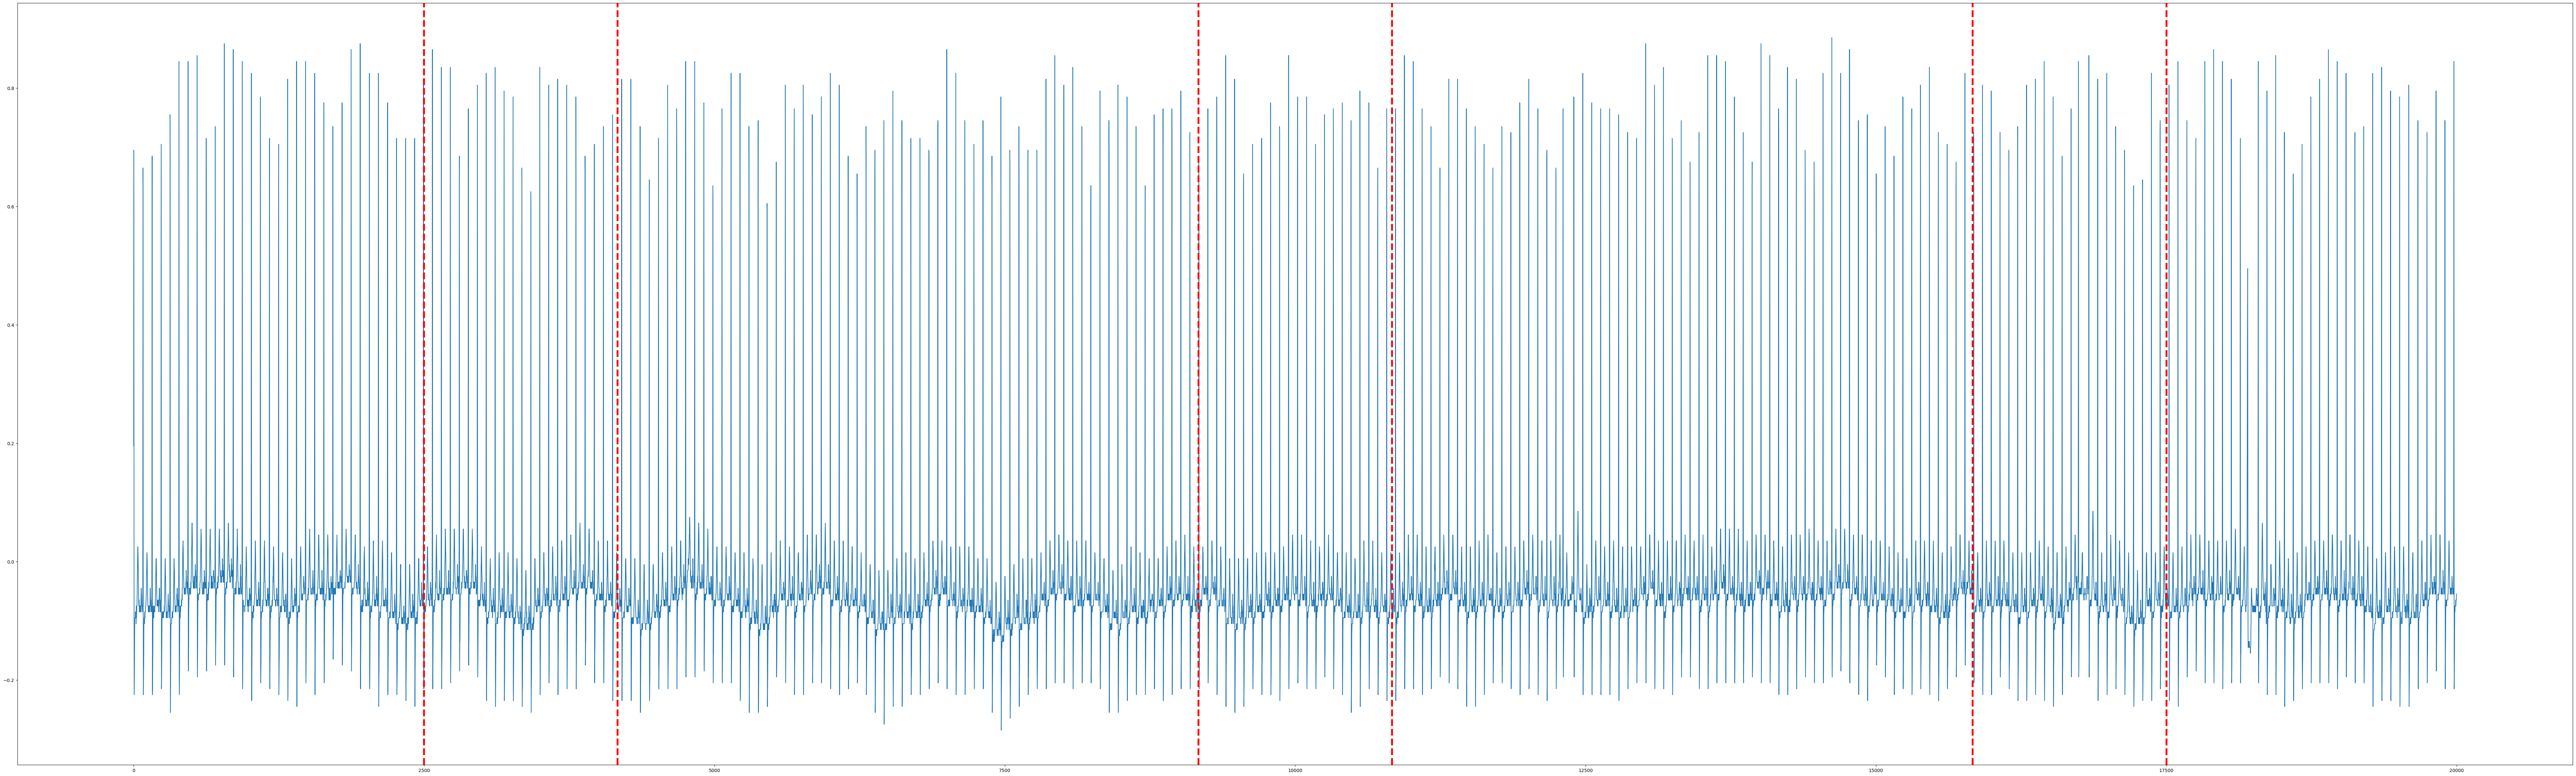

In [6]:
# creating two anomaly modules, can be reused in intervals
pointanomaly1 = PointAnomaly(0.02, [0.1, 0.2, -0.5, -0.1])
pointanomaly2 = PointAnomaly(0.1, [0.5, -0.5])


anomaly_addition_1.create_intervals(3,5000)
# add drift modules here corresponding to intervals
anomaly_addition_1.add_anomalies(pointanomaly1, pointanomaly1, pointanomaly2)

anomaly_addition_1.plot_dataset()